<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_2_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.285575,53.477804,39.023712,74.921396,250.708487,82.030418,168.678069
1,0.0,1.0,62.749262,51.928208,38.231461,62.183569,225.092500,59.839622,165.252878
2,0.0,2.0,85.898120,34.418029,91.090209,-73.507408,147.898949,261.609930,-113.710980
3,0.0,3.0,55.137433,57.449110,57.729812,-246.011347,-65.694992,136.841594,-202.536586
4,0.0,4.0,41.225045,69.253238,69.731805,157.944904,348.154993,189.174574,158.980419
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,58.318258,243.361752,235.417381,7.944371
19996,999.0,16.0,92.663682,58.512599,35.091714,20.137892,216.405887,222.256415,-5.850528
19997,999.0,17.0,63.062248,86.565478,27.853802,352.658819,540.140347,238.287172,301.853175
19998,999.0,18.0,47.655607,57.944117,86.192826,6.048052,207.840602,221.719111,-13.878509


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.285575,53.477804,39.023712,74.921396,250.708487,82.030418,168.678069
1,0.0,1.0,62.749262,51.928208,38.231461,62.183569,225.092500,59.839622,165.252878
2,0.0,2.0,85.898120,34.418029,91.090209,-73.507408,147.898949,261.609930,-113.710980
3,0.0,3.0,55.137433,57.449110,57.729812,-246.011347,-65.694992,136.841594,-202.536586
4,0.0,4.0,41.225045,69.253238,69.731805,157.944904,348.154993,189.174574,158.980419
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,58.318258,243.361752,235.417381,7.944371
19996,999.0,16.0,92.663682,58.512599,35.091714,20.137892,216.405887,222.256415,-5.850528
19997,999.0,17.0,63.062248,86.565478,27.853802,352.658819,540.140347,238.287172,301.853175
19998,999.0,18.0,47.655607,57.944117,86.192826,6.048052,207.840602,221.719111,-13.878509


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    73.285575  53.477804  ...   82.030418  168.678069
      1.0    62.749262  51.928208  ...   59.839622  165.252878
      2.0    85.898120  34.418029  ...  261.609930 -113.710980
      3.0    55.137433  57.449110  ...  136.841594 -202.536586
      4.0    41.225045  69.253238  ...  189.174574  158.980419
...                ...        ...  ...         ...         ...
999.0 15.0   23.294746  92.518305  ...  235.417381    7.944371
      16.0   92.663682  58.512599  ...  222.256415   -5.850528
      17.0   63.062248  86.565478  ...  238.287172  301.853175
      18.0   47.655607  57.944117  ...  221.719111  -13.878509
      19.0   99.921349  36.147862  ...  198.723510  136.734209

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    73.285575  53.477804  ...   82.030418  168.678069
      1.0    62.749262  51.928208  ...   59.839622  165.252878
      2.0    85.898120  34.418029  ...  261.609930 -113.710980
      3.0    55.137433  57.449110  ...  136.841594 -202.536586
      4.0    41.225045  69.253238  ...  189.174574  158.980419
...                ...        ...  ...         ...         ...
999.0 15.0   23.294746  92.518305  ...  235.417381    7.944371
      16.0   92.663682  58.512599  ...  222.256415   -5.850528
      17.0   63.062248  86.565478  ...  238.287172  301.853175
      18.0   47.655607  57.944117  ...  221.719111  -13.878509
      19.0   99.921349  36.147862  ...  198.723510  136.734209

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.285575,53.477804,39.023712,74.921396,250.708487,82.030418,168.678069
1,0.0,1.0,62.749262,51.928208,38.231461,62.183569,225.092500,59.839622,165.252878
2,0.0,2.0,85.898120,34.418029,91.090209,-73.507408,147.898949,261.609930,-113.710980
3,0.0,3.0,55.137433,57.449110,57.729812,-246.011347,-65.694992,136.841594,-202.536586
4,0.0,4.0,41.225045,69.253238,69.731805,157.944904,348.154993,189.174574,158.980419
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,58.318258,243.361752,235.417381,7.944371
19996,999.0,16.0,92.663682,58.512599,35.091714,20.137892,216.405887,222.256415,-5.850528
19997,999.0,17.0,63.062248,86.565478,27.853802,352.658819,540.140347,238.287172,301.853175
19998,999.0,18.0,47.655607,57.944117,86.192826,6.048052,207.840602,221.719111,-13.878509


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    73.285575  53.477804  ...   82.030418  168.678069
      1.0    62.749262  51.928208  ...   59.839622  165.252878
      2.0    85.898120  34.418029  ...  261.609930 -113.710980
      3.0    55.137433  57.449110  ...  136.841594 -202.536586
      4.0    41.225045  69.253238  ...  189.174574  158.980419
...                ...        ...  ...         ...         ...
999.0 15.0   23.294746  92.518305  ...  235.417381    7.944371
      16.0   92.663682  58.512599  ...  222.256415   -5.850528
      17.0   63.062248  86.565478  ...  238.287172  301.853175
      18.0   47.655607  57.944117  ...  221.719111  -13.878509
      19.0   99.921349  36.147862  ...  198.723510  136.734209

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

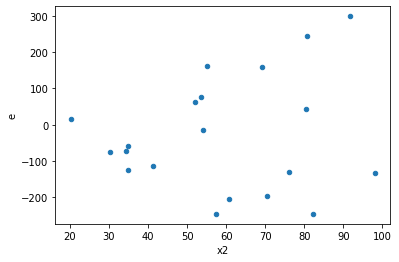

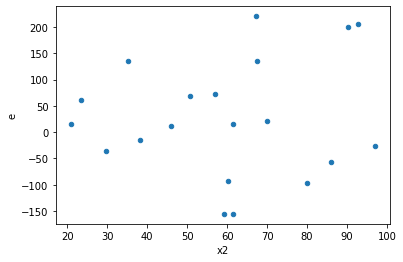

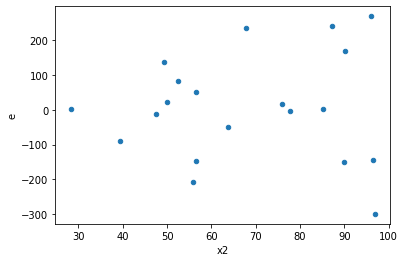

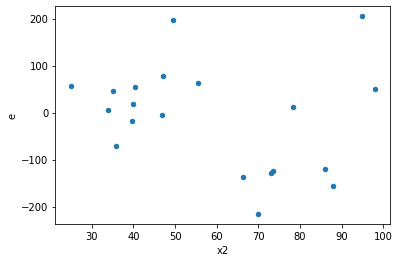

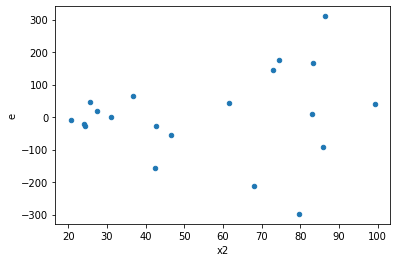

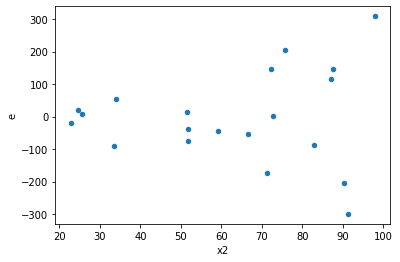

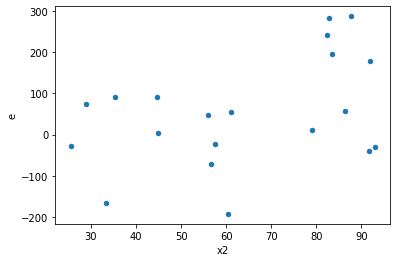

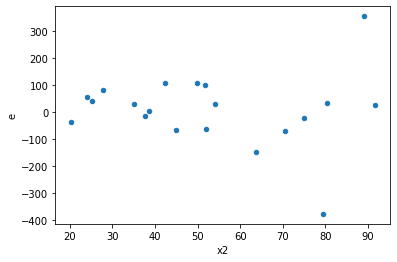

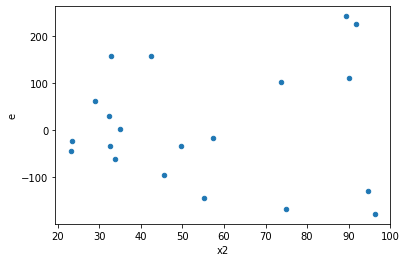

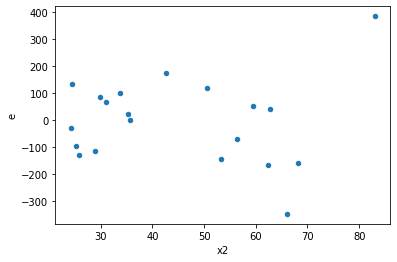

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,5.0,5.0,58344.14465377025,9157.189534955474,14586.036163442563,2289.2973837388686,6.371402975886307,0.06323005111653979,0.9683849744417301,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,228883.98119851056,55192.6831624544,57220.99529962764,13798.1707906136,4.146998625249155,0.1446074619317066,0.9276962690341467,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,56540.33640560366,5673.245663813397,14135.084101400915,1418.3114159533493,9.966135745935391,0.024665380668907,0.9876673096655465,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,188391.46740244696,10214.677432616143,47097.86685061174,2553.6693581540358,18.443212587496937,0.006162360463128458,0.9969188197684358,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,303048.3266896343,1715.4017322949092,75762.08167240857,428.8504330737273,176.66318098222297,2.566912788548592e-05,0.9999871654360573,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,219856.89753895267,3846.193126269577,54964.22438473817,961.5482815673943,57.16220957219377,0.00041340810381318427,0.9997932959480934,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,195506.72758507644,21171.393557050815,48876.68189626911,5292.848389262704,9.234476089551784,0.02909484749194391,0.985452576254028,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,168783.96436246033,44990.83698303623,42195.99109061508,11247.709245759057,3.7515186575902164,0.1730912015711814,0.9134543992144093,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,146902.11245122537,3133.343362026286,36725.52811280634,783.3358405065715,46.88350285243746,0.0006695399524363488,0.9996652300237818,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,7722.278405602728,10582.39576988452,1930.569601400682,2645.59894247113,0.7297287470176517,0.7379668098397025,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,58344.14465377025,9157.189534955474,14586.036163442563,2289.2973837388686,6.371402975886307,0.06323005111653979,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,228883.98119851056,55192.6831624544,57220.99529962764,13798.1707906136,4.146998625249155,0.1446074619317066,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,56540.33640560366,5673.245663813397,14135.084101400915,1418.3114159533493,9.966135745935391,0.024665380668907,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,188391.46740244696,10214.677432616143,47097.86685061174,2553.6693581540358,18.443212587496937,0.006162360463128458,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,303048.3266896343,1715.4017322949092,75762.08167240857,428.8504330737273,176.66318098222297,2.566912788548592e-05,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,56466.11426793025,57179.11577288864,14116.528566982563,14294.77894322216,0.9875303859578666,0.9893492659046045,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,219856.89753895267,3846.193126269577,54964.22438473817,961.5482815673943,57.16220957219377,0.00041340810381318427,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,195506.72758507644,21171.393557050815,48876.68189626911,5292.848389262704,9.234476089551784,0.02909484749194391,Reject001=1 : Homoscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      753
Reject001=0 : Heteroscedasticity    247
Name: Result_test, dtype: int64